In [5]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [6]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

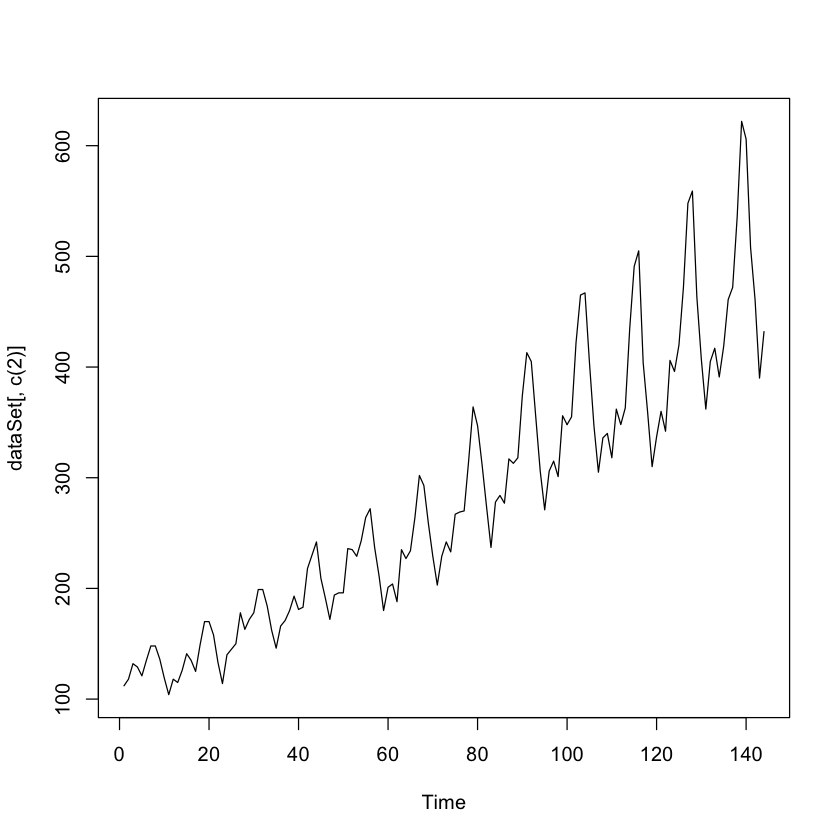

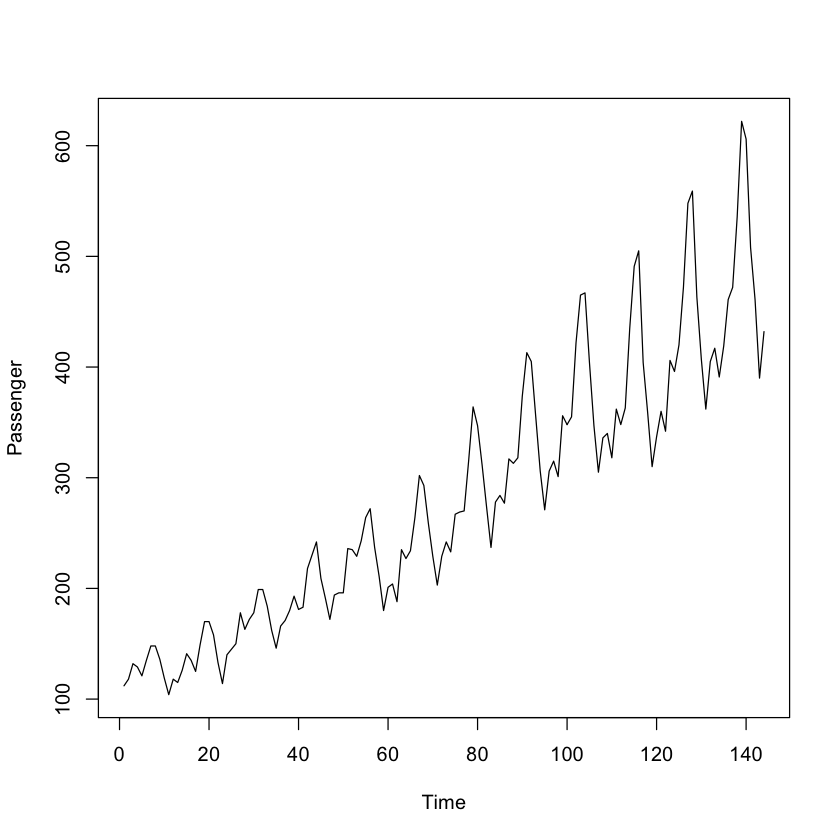

In [7]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [8]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

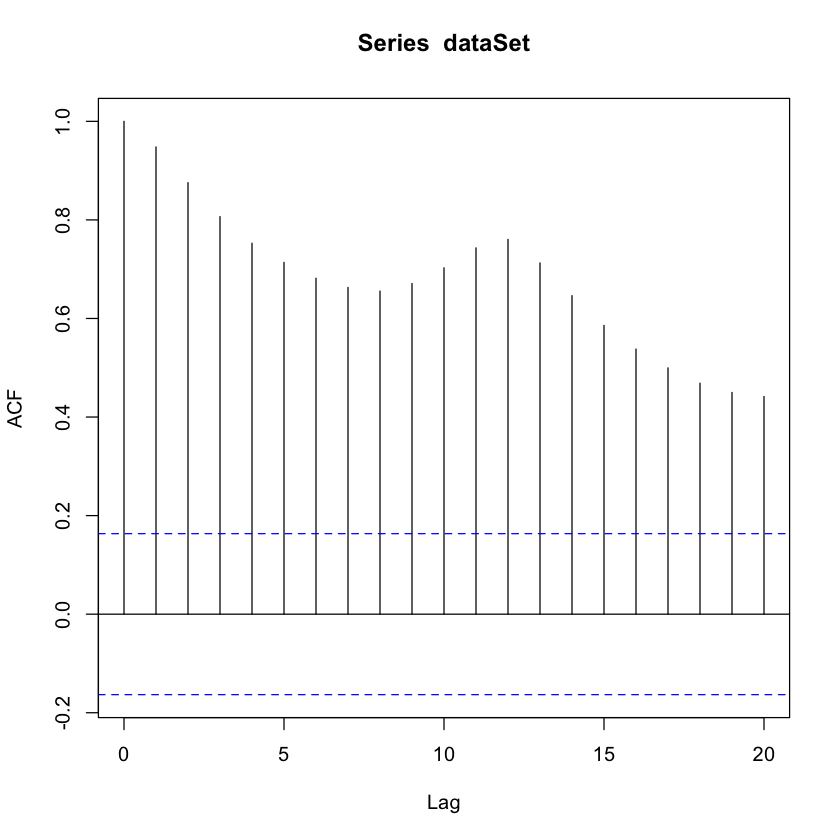

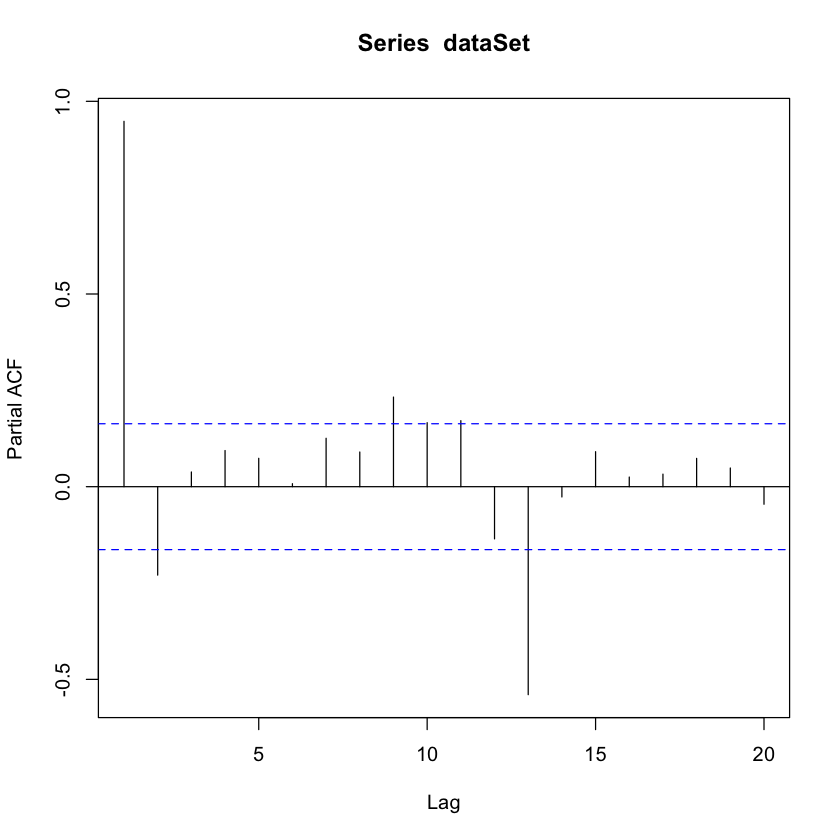

In [9]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  

Series: dataSet 
Model:  NNAR(13,4) 
Call:   nnetar(y = dataSet, size = 4, repeats = 100)

Average of 100 networks, each of which is
a 13-4-1 network with 61 weights
options were - linear output units 

sigma^2 estimated as 35.71
[1] 0.9972759


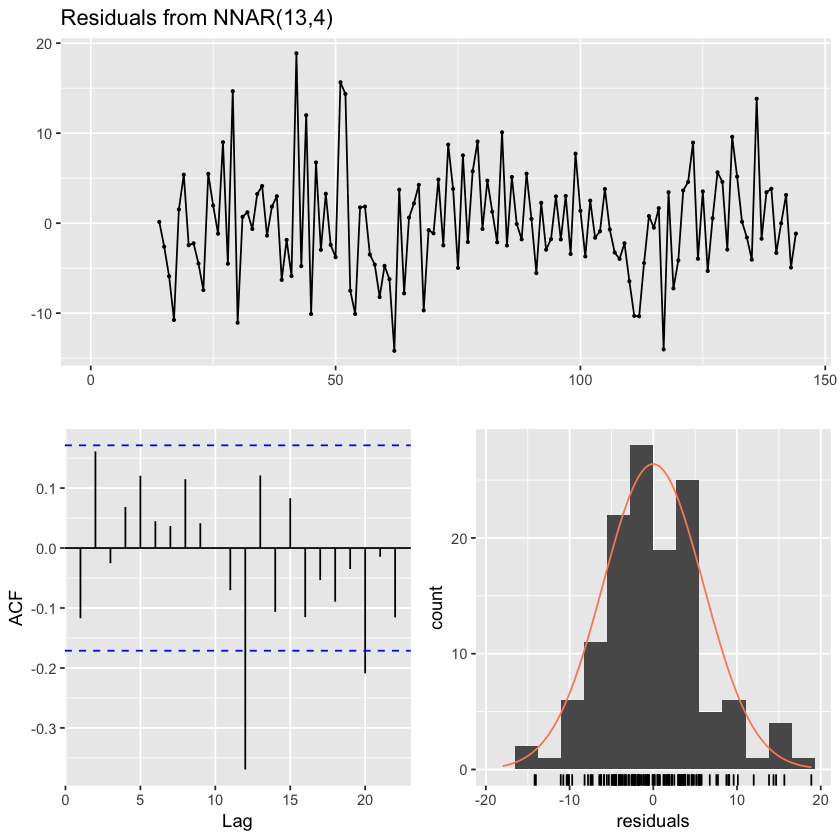

In [11]:
# NNetAR Model
fit_nnetar <- nnetar(dataSet, repeats = 100, size = 4)
print(fit_nnetar)

checkresiduals(fit_nnetar)

# Calculate R squared value : r2
r <- cor(fitted(fit_nnetar)[14:length(dataSet)], dataSet[14:length(dataSet)])
r2 <- cor(fitted(fit_nnetar)[14:length(dataSet)], dataSet[14:length(dataSet)])^2
print(r2)

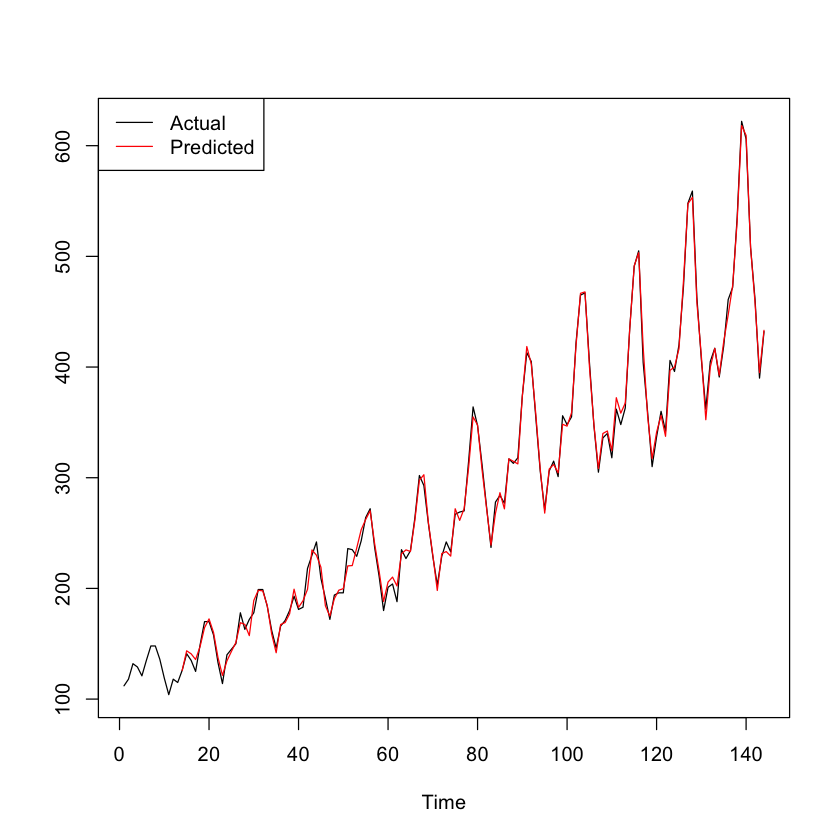

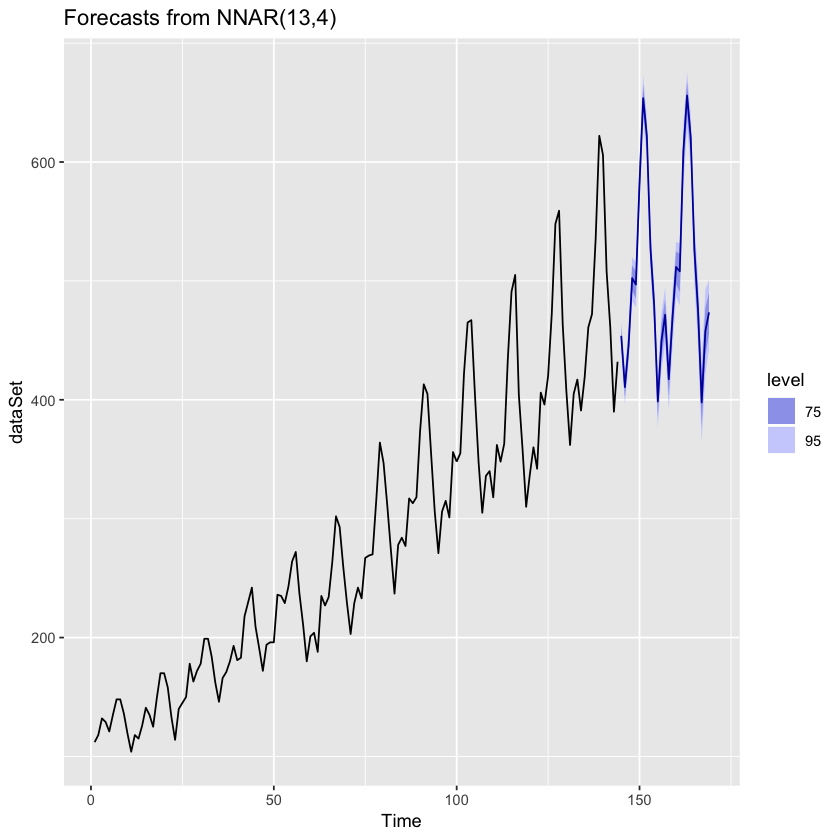

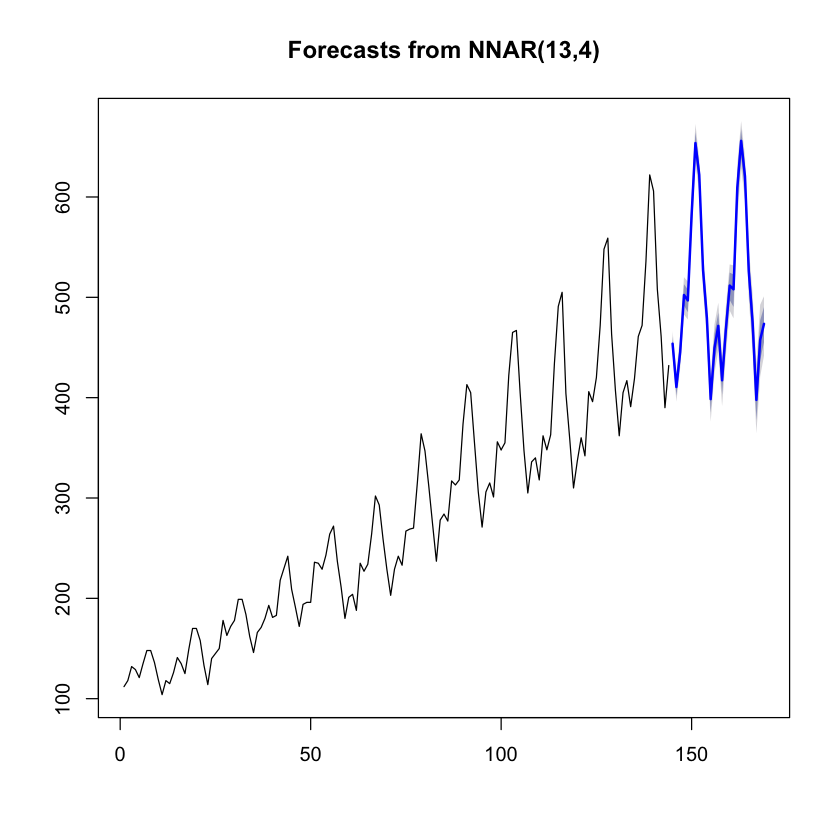

In [12]:
# ---------------------------------
# Plot Time Series Forecasting
# ---------------------------------
x <- dataSet            # actual
y <- fitted(fit_nnetar)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)


# Plotting Observed and Predicted with CI
forecast_ <- forecast:::forecast.nnetar(fit_nnetar, h = 25, level = c(75,95), PI = TRUE)
autoplot(forecast_)

par(mfrow=c(1,1))
plot(forecast_)